In [1]:
import pandas as pd

df = pd.read_csv('adults.csv')

In [4]:
# Q1
df.head(10)

,capital-gain,capital-loss,sex,age,salary,occupation,hours-per-week
0,200,0.0,Female,18,<=50k,A,40
1,100,-50.0,Male,19,>50k,B,42
2,100,100.0,Female,26,>50k,A,30
3,150,0.0,Female,20,<=50k,C,45
4,0,-1.0,Male,17,>50k,A,39


In [5]:
# Q2
df = pd.read_csv('adults.csv', na_values={'capital-loss': 'Not found'})
df = df.fillna({'capital-loss': 0})
df.head(10)

,capital-gain,capital-loss,sex,age,salary,occupation,hours-per-week
0,200,0.0,Female,18,<=50k,A,40
1,100,-50.0,Male,19,>50k,B,42
2,100,100.0,Female,26,>50k,A,30
3,150,0.0,Female,20,<=50k,C,45
4,0,-1.0,Male,17,>50k,A,39
5,0,-1.0,Male,17,>50k,A-a,39


In [6]:
# Q3
df['occupation'] = df['occupation'].str.replace('-', ' ', regex=False)
df

,capital-gain,capital-loss,sex,age,salary,occupation,hours-per-week
0,200,0.0,Female,18,<=50k,A,40
1,100,-50.0,Male,19,>50k,B,42
2,100,100.0,Female,26,>50k,A,30
3,150,0.0,Female,20,<=50k,C,45
4,0,-1.0,Male,17,>50k,A,39
5,0,-1.0,Male,17,>50k,A a,39


In [14]:
# Q4

# zero_gain = df[df['capital-gain'] == 0].count()['capital-gain']
# zero_gain = df[df['capital-gain'] == 0]['capital-gain'].count()

zero_gain = df[df['capital-gain'] == 0]['capital-gain'].count()
zero_loss = df[df['capital-loss'] == 0]['capital-loss'].count()

print('The number of zero gain: ', zero_gain)
print('The number of zero loss: ', zero_loss)

print(f'The percetage of zero capital gain is %: {zero_gain / len(df) * 100:.2f}')
print(f'The percetage of zero capital loss is %: {zero_loss / len(df) * 100:.2f}')

The number of zero gain:  2
The number of zero loss:  2
The percetage of zero capital gain is %: 33.33
The percetage of zero capital loss is %: 33.33


In [17]:
# Q5
#                 1. 篩選女性   2.獲取年齡   3.算平均
avg_women_age = df[df['sex'] == 'Female']['age'].mean()

print(f'The average age of Women is: {avg_women_age:.2f}')

The average age of Women is: 21.33


In [18]:
df.groupby('salary')['age'].mean()

salary
<=50k    19.00
>50k     19.75
Name: age, dtype: float64

In [19]:
sal_grp = df.groupby('salary')['age'].mean()
avg_age_below_50k = sal_grp['<=50k']
avg_age_above_50k = sal_grp['>50k']

print(avg_age_below_50k, avg_age_above_50k)

19.0 19.75


In [20]:
df[df['salary'] == '<=50k']['age'].mean()

19.0

In [21]:
# Q7
above_50k = df[df['salary'] == ">50k"]
above_50k

,capital-gain,capital-loss,sex,age,salary,occupation,hours-per-week
1,100,-50.0,Male,19,>50k,B,42
2,100,100.0,Female,26,>50k,A,30
4,0,-1.0,Male,17,>50k,A,39
5,0,-1.0,Male,17,>50k,A a,39


In [24]:
above_50k.groupby('occupation').count()

,capital-gain,capital-loss,sex,age,salary,hours-per-week
occupation,,,,,,
A,2,2,2,2,2,2
A a,1,1,1,1,1,1
B,1,1,1,1,1,1


In [30]:
above_50k_df = above_50k.groupby('occupation').count().reset_index()
above_50k_df

,occupation,capital-gain,capital-loss,sex,age,salary,hours-per-week
0,A,2,2,2,2,2,2
1,A a,1,1,1,1,1,1
2,B,1,1,1,1,1,1


In [31]:
max_count = above_50k_df['capital-gain'].max()
above_50k_df[above_50k_df['capital-gain'] == max_count]['occupation']

0    A
Name: occupation, dtype: object

In [35]:
above_50k_df.sort_values(by='capital-gain', ascending=False).head(1)['occupation']

0    A
Name: occupation, dtype: object

<Axes: >

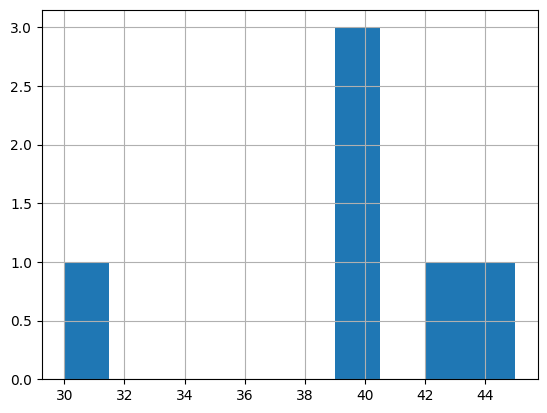

In [37]:
# Q8
df['hours-per-week'].hist()

<Axes: ylabel='Frequency'>

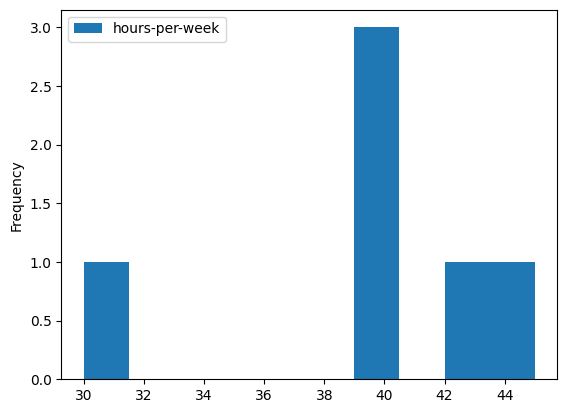

In [39]:
df.plot.hist(y='hours-per-week')

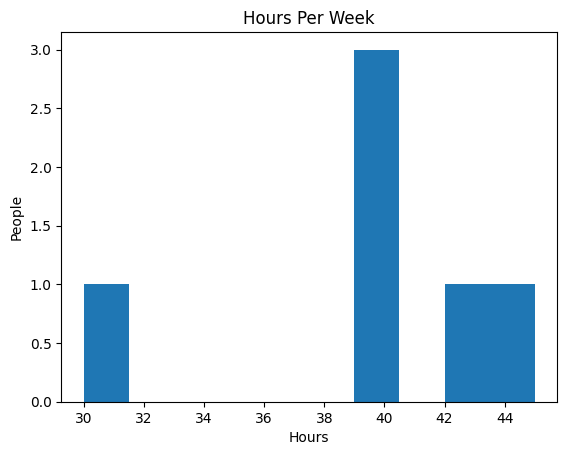

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df['hours-per-week'].plot(kind="hist", ax=ax)
ax.set(title="Hours Per Week", xlabel="Hours", ylabel="People")

plt.show()